# Project: Investigate the important factors that help predicting the non-show up of patients.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Dataset**: in order to understand the main factors that lead the patients to not show up, I have selected the no-show appointements dataset.
this dataset collects information from 100k medical appointments in Brazil where a number of characteristics about the patient are included in each row. ‘ScheduledDay’ tells us on what day the patient set up their appointment, ‘Neighborhood’ indicates the location of the hospital, ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família, 'No-show' ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

> **Questions**: the main focus is to get a better understanding of the data in order to predict whether or not patients show up for their appointment, I am going to investigate the relation of different factors with fact of not showing up.

## Importing the necessary packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

##### Loading the data and printing out the first and last 5 lines. 

In [3]:
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


##### inspecting the data

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
# inspecting the unique values in each column.
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
# inspecting if there is any missing or possibly errant data.
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [10]:
# inspecting if there is any duplicated rows.
df.duplicated().sum()

0

> We have 110527 samples with 14 features, there is no null, na's , or duplicated rows.
> We have data where the patient age is 0, I assume thoese are new born, There is one row where the patient is -1 years old which is not normal, it has be removed

> the data types are good except for dates : Scheduled Day and Appointment Day which I will fix next


### Data Cleaning 

> Removing the row that contain a patient that has -1 years old

In [11]:
df = df.drop((df.query('Age < 0 ')).index)

> Fixing the data type of the Scheduled day and Appointment day columns

In [12]:
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

> Let's inspect the data again to confirm

In [13]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 12.6+ MB


<a id='eda'></a>
## Exploratory Data Analysis


#### What is the number and percentage of patients that did not show up?

In [16]:
df_not_showing = df[df['No-show']== 'Yes']
df_showing = df[df['No-show']== 'No']
No_notShowing = len(df_not_showing)
No_notShowing

22319

In [17]:
pct_notShowing = 100 * (No_notShowing / len(df))
pct_notShowing

20.193438647919944

> 22319 patients (20.19%) didn't show up

#### Is the appointment day not suitable for patients to show up?

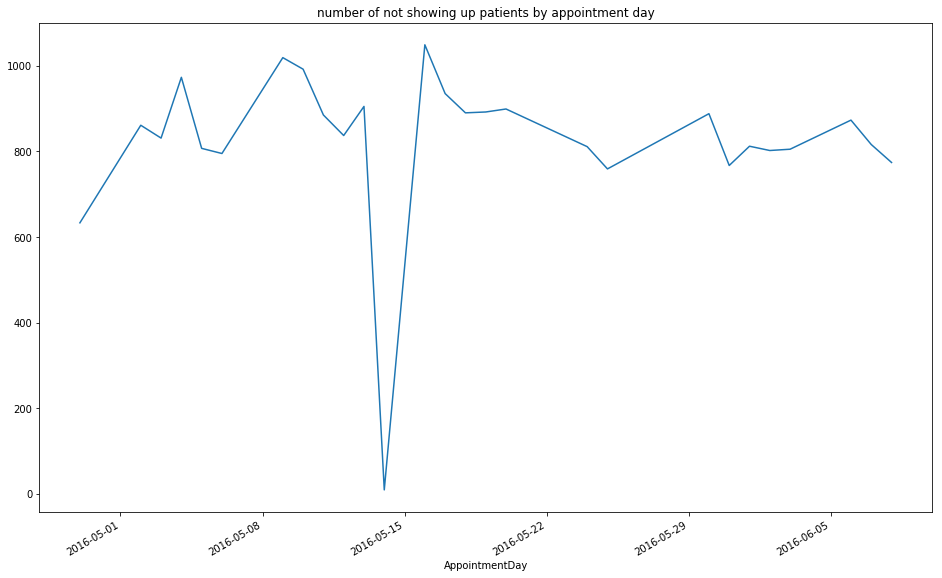

In [78]:
df_not_showing.groupby(['AppointmentDay'])['PatientId'].count().plot(figsize= (16,10), title= 'number of not showing up patients by appointment day');

In [80]:
df[df['AppointmentDay'] == '2016-05-15']

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


> Appointment days has no direct impact on the patients who didn't show up

#### What is the number and age of patients that did not show up?

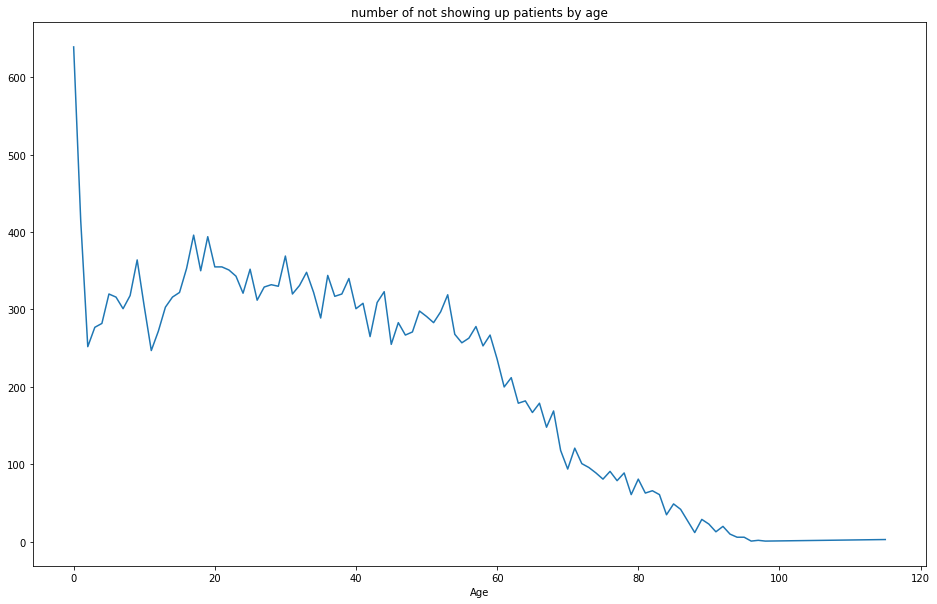

In [62]:
df_not_showing.groupby(['Age'])['PatientId'].count().plot(figsize= (16,10), title= 'number of not showing up patients by age');

In [63]:
df_not_showing.query('Age <= 1')['PatientId'].count()

1054

> it seems like the older the patient the most likelihood he show up,and the new born ones has the highest rate (1054) of not showing up, 


#### What about Gender?

In [21]:
df_not_showing.groupby(['Gender'])['PatientId'].count()

Gender
F    14594
M     7725
Name: PatientId, dtype: int64

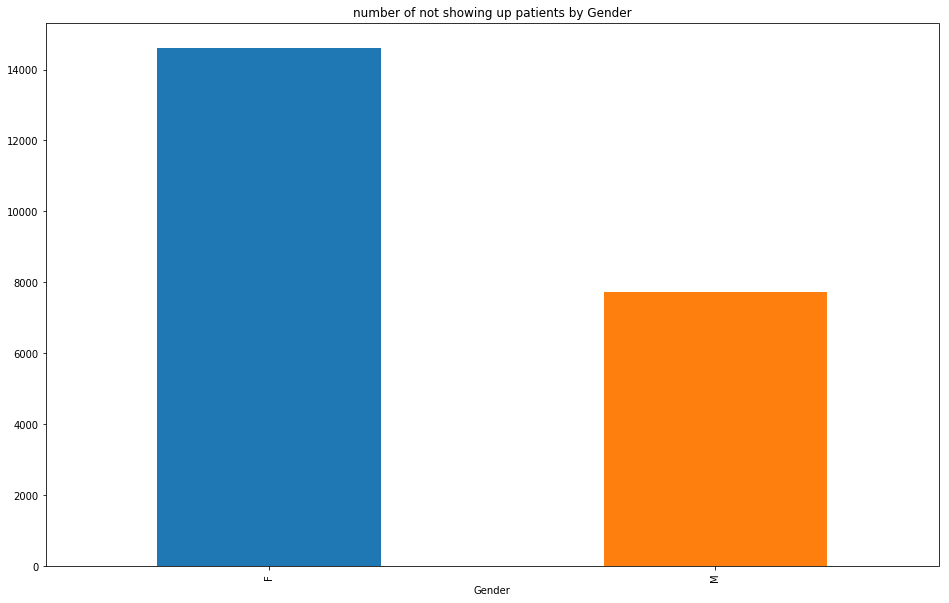

In [64]:
df_not_showing.groupby(['Gender'])['PatientId'].count().plot(kind= 'bar',figsize= (16,10), title= 'number of not showing up patients by Gender');

In [65]:
100 * (len(df_not_showing.query('Gender == "F"')) / len(df_not_showing))

65.3882342398853

>Females have higher rate of not showing up than males

#### do patients from specefic neighbourhood have a higher rates of not showing up?

In [51]:
pct_by_Neighbourhood = 100 * df_not_showing.groupby(['Neighbourhood'])['PatientId'].count() / No_notShowing
pct_by_Neighbourhood.sort_values(ascending= False)

Neighbourhood
JARDIM CAMBURI                 6.563914
MARIA ORTIZ                    5.461714
ITARARÉ                        4.135490
RESISTÊNCIA                    4.059322
CENTRO                         3.149783
JESUS DE NAZARETH              3.118419
JARDIM DA PENHA                2.827188
CARATOÍRA                      2.647968
TABUAZEIRO                     2.567319
BONFIM                         2.464268
ILHA DO PRÍNCIPE               2.383619
ANDORINHAS                     2.334334
SÃO PEDRO                      2.307451
SANTO ANDRÉ                    2.276088
SANTA MARTHA                   2.222322
SANTO ANTÔNIO                  2.168556
ROMÃO                          2.123751
GURIGICA                       2.043102
JABOUR                         2.020700
DA PENHA                       1.922129
SÃO JOSÉ                       1.917649
MARUÍPE                        1.899727
NOVA PALESTINA                 1.801156
BELA VISTA                     1.720507
SANTOS DUMONT             

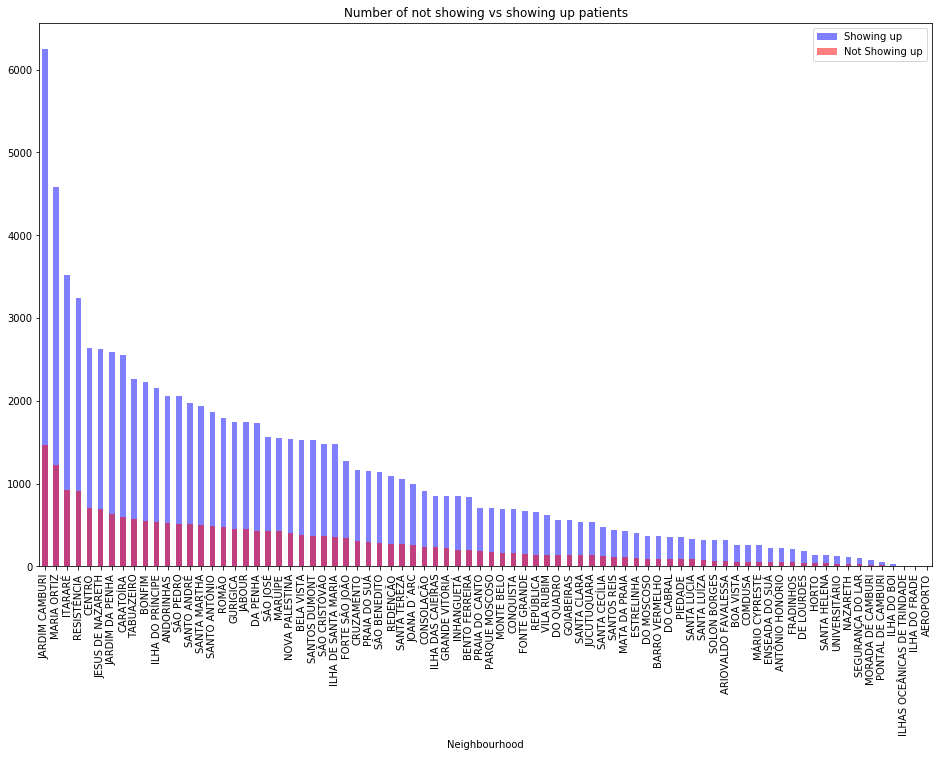

In [53]:
df_showing.groupby(['Neighbourhood'])['PatientId'].count().sort_values(ascending= False).plot(kind= 'bar',figsize= (16,10), alpha = 0.5, color= 'blue', label = 'Showing up')
df_not_showing.groupby(['Neighbourhood'])['PatientId'].count().sort_values(ascending= False).plot(kind= 'bar',figsize= (16,10), alpha = 0.5, color='red', label = 'Not Showing up')
plt.title('Number of not showing vs showing up patients')

plt.legend()

In [72]:
pct_notShowing_Neighbourhood = 100 * df_not_showing.groupby(['Neighbourhood'])['PatientId'].count() / df.groupby(['Neighbourhood'])['PatientId'].count()
pct_notShowing_Neighbourhood[pct_notShowing_Neighbourhood > pct_notShowing].count(), pct_notShowing_Neighbourhood.count()

(34, 80)

> 34 over 80 neighbourhoods have a higher rates of not showing up

### Patients characteristics:

####  do patients enrolled in Brasilian welfare program have a better rates?

In [55]:
df_not_showing.groupby(['Scholarship'])['PatientId'].count()

Scholarship
0    19741
1     2578
Name: PatientId, dtype: int64

> Indeed the patients who enrolled in Brasilian welfare program do show up more than the ones who didn't enrolled.

#### what about patients with special maladies?

In [56]:
df_not_showing.groupby(['Hipertension'])['PatientId'].count()

Hipertension
0    18547
1     3772
Name: PatientId, dtype: int64

In [57]:
df_not_showing.groupby(['Diabetes'])['PatientId'].count()

Diabetes
0    20889
1     1430
Name: PatientId, dtype: int64

In [58]:
df_not_showing.groupby(['Alcoholism'])['PatientId'].count()

Alcoholism
0    21642
1      677
Name: PatientId, dtype: int64

In [59]:
df_not_showing.groupby(['Handcap'])['PatientId'].count()

Handcap
0    21912
1      366
2       37
3        3
4        1
Name: PatientId, dtype: int64

> it seems that Hipertension, Diabetes, Alcoholism, Handcap has no direct impact of the patients decision to not show up.

#### What if the patients didn't receive an sms?

In [60]:
df_not_showing.groupby(['SMS_received'])['PatientId'].count()

SMS_received
0    12535
1     9784
Name: PatientId, dtype: int64

> not receiving an sms may be a reason of not showing up but not a decisif one.

<a id='conclusions'></a>
## Conclusions
> No matter the decease, Most patients enrolled in Brasilian welfare program showed up for their appointement, and inversly the ones who didn't enroll mostly didn't show up especialy the younger ones and females.

> patients from 34 neighbourhoods didn't show up with a rate esceeding the national mean.

> The measures taken by hospitals (sending sms) works but not very well, other measures must be taken to help patients to show up more frequently.



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [87]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0